In [1]:
import numpy as np

In [2]:
X_size = 300

In [3]:
X = 2 * np.random.randn(X_size, 1)

In [4]:
y = 4 + 3 * X + np.random.randn(X_size, 1)

In [5]:
import psycopg2

In [6]:
import matplotlib.pyplot as plt

Mesma regressão linear implementada com scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

In [38]:
xxx = (10, 12)
len(xxx)

2

In [52]:
def apply_regression(X, y):
    X_ = np.array(X)
    if len(X_.shape) < 2:
        X_ = X_.reshape(-1, 1)
        
    lin_reg = LinearRegression()
    lin_reg.fit(X_, y)
    print("intercept", lin_reg.intercept_, "coef", lin_reg.coef_)
    truth = y
    prediction = lin_reg.predict(X_)
    error = np.abs(truth - prediction)
    print("mean", np.mean(error), "var", np.var(error), "std", np.std(error))
    return prediction, error

In [53]:
prediction, error = apply_regression(X, y)

intercept [3.93117217] coef [[3.0100889]]
mean 0.778087477263558 var 0.35124042002209116 std 0.5926553973618153


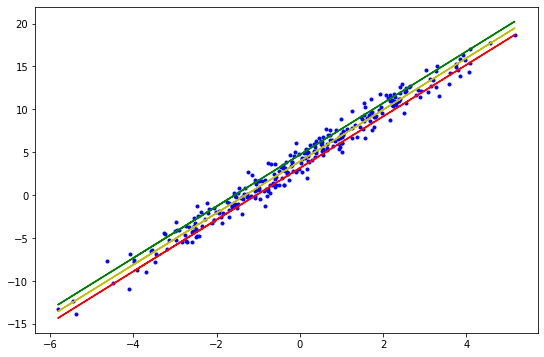

In [54]:
plt.figure(figsize=(9, 6))
plt.plot(X, y, "b.")
plt.plot(X, prediction, "y-")
plt.plot(X, prediction + np.mean(error), "g-")
plt.plot(X, prediction - np.mean(error), "r-")
plt.show()

In [55]:
def fetch_data(equity_name='ITSA3'):
    query = """
        select dq.close_value from company c 
        left join daily_quote dq on c.id = dq.company_id
        where c.label = '{}'
        order by dq.event_date
    """.format(equity_name)
    with psycopg2.connect(database="postgres", user="postgres") as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            db_data = cur.fetchall()
            return [float(value) for (value, ) in db_data] # could use a generator instead...

In [56]:
itsa3 = fetch_data("ITSA3")
period = list(range(len(itsa3)))
np.array(period).shape

(1161,)

In [57]:
prediction, error = apply_regression(period, itsa3)

intercept 5.052306999278027 coef [0.00707986]
mean 1.0817244026237816 var 0.7946167638914496 std 0.8914127909624416


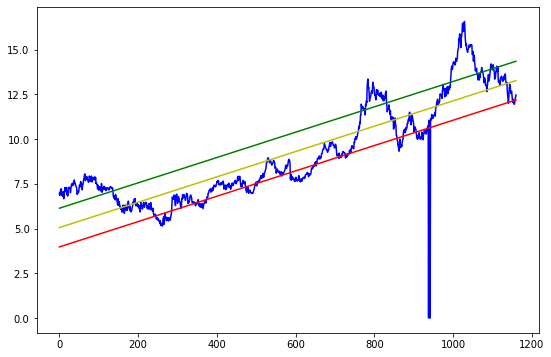

In [64]:
plt.figure(figsize=(9, 6))
plt.plot(period, itsa3, "b")
plt.plot(period, prediction, "y")
plt.plot(period, prediction + np.mean(error), "g")
plt.plot(period, prediction - np.mean(error), "r")
plt.show()